# Project: Cleaning And Analyzing Data
## Introduction:
Hi! I am Mujibur Rahman Bhuniyan. I am a physicist and data scientist. This project is to show my data cleaning and analyzing skills.
In this project, I am going to clean and analyze the Automobile dataset from the UCI Machine Learning Database. The dataset contains features of the car and its price. The features can be used to predict the price of the car. But not all features are the same. I will use python pandas to clean and analyze the data to extract the meaning behind the data. We will be able to see which features are important and can be used to predict the car prices. We can then use some Machine Learning to develop a model for this. We will later evaluate the model and see its effectiveness. The steps I am going to take for the data analysis project are the following
1. Extract the data from the database and get a basic insight of the data
2. Data Wrangling to convert it into a suitable format for better analysis
3. Exploratory Data Analysis to find meaningful features in the data
4. Developiong a model based on the information we learned from the previous section
5. Evaluate the model with different evaluation techniques to find how effective the model is

So, be patient while I uncover the mysteries of the data.

## 1. Getting the data
This data is hosted at the UCI Machine Learning Database. It is in csv format. So, we won't have to make our hands dirty by writing queries to get the data from the database. The source for the data is https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data 
I will use Pandas library in python to import and load it into the dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [2]:
#The data doesn't have a header. So, we set 'header = None'
df= pd.read_csv(filepath, header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


To get the header, we can read about the dataset at https://archive.ics.uci.edu/ml/datasets/Automobile and get information about it. They have a list of names for the fields in the dataset. We get those and add to our dataset as the column names.

In [3]:
names=[ 'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width','height', 'curb-weight', 'engine-type' ,'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

df.columns = names
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Let's get a statistical summary of each field

In [4]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


From the "description" of the dataframe, we can see that a lot of field has some entries as '?'. These are the missing values. We will have to deal with these values. We can replace the '?' with NaN. That way it'd be easier to identify them.

In [6]:
df.replace('?', np.nan, inplace=True)

In [7]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,13499
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


### Deal with the missing data

In [8]:
nan_values = df.isnull()

for i in nan_values.columns:
    if nan_values[i].sum() >0:
        print(i,' has ',nan_values[i].sum(), ' missing values')
    

normalized-losses  has  41  missing values
num-of-doors  has  2  missing values
bore  has  4  missing values
stroke  has  4  missing values
horsepower  has  2  missing values
peak-rpm  has  2  missing values
price  has  4  missing values


Since our goal is to build a model to predict price of the car, we only need the listing with prices available. So, we will drop all null values in that field.

In [9]:
print(df.shape)
df.dropna(subset=['price'], axis=0,inplace=True)
df.reset_index(drop=True)
print(df.shape)
df.head()

(205, 26)
(201, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Number of doors can be figured out from the body style information.

In [10]:
df[df['num-of-doors'].isnull()]['body-style']

27    sedan
63    sedan
Name: body-style, dtype: object

Since they are both sedan, we know they'll have 4 doors.

In [11]:
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

nan_values = df.isnull()
for i in nan_values.columns:
    if nan_values[i].sum() >0:
        print(i,' has ',nan_values[i].sum(), ' missing values')

normalized-losses  has  37  missing values
bore  has  4  missing values
stroke  has  4  missing values
horsepower  has  2  missing values
peak-rpm  has  2  missing values


We replace missing values in normalized losses with their average

In [12]:
df['normalized-losses']= df['normalized-losses'].astype('float')
norm_loss_avg = df['normalized-losses'].mean()
norm_loss_avg

122.0

In [13]:
df['normalized-losses'].replace(np.nan, norm_loss_avg, inplace=True)

Bore, stroke, horsepower, and peak-rpm can be replaced with their mean

In [14]:
df[['bore', 'stroke', 'horsepower', 'peak-rpm']] = df[['bore', 'stroke', 'horsepower', 'peak-rpm']].astype('float')
bore_avg = df['bore'].mean()
stroke_avg = df['stroke'].mean()
horsepower_avg = df['horsepower'].mean()
peak_rpm_avg = df['peak-rpm'].mean()

df['bore'].replace(np.nan, bore_avg, inplace=True)
df['stroke'].replace(np.nan, stroke_avg, inplace=True)
df['horsepower'].replace(np.nan, horsepower_avg, inplace=True)
df['peak-rpm'].replace(np.nan, peak_rpm_avg, inplace=True)

Let's check the missing values again

In [15]:
nan_values = df.isnull()
for i in nan_values.columns:
    if nan_values[i].sum() >0:
        print(i,' has ',nan_values[i].sum(), ' missing values')

#df.head()

## Data Types
We can take a look at the data types and see if they are in the correct format. Otherwise, it might cause issue in the future steps.

In [16]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<b>Here, we can see the column 'price' should be in 'float' format.

In [17]:
df[['price']]=df[['price']].astype('float')
df['price'].dtypes

dtype('float64')

In [18]:
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis
In this section, we will analyze the data to find the correlation between the price and other features of the dataframe.

In [19]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075790,0.279719,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371250,-0.360233,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579731,-0.286035,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.615006,-0.245852,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086941,-0.309913,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.757994,-0.279350,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822649,-0.256753,-0.650546,-0.679571,0.872335
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566838,-0.267338,-0.582121,-0.591390,0.543154
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097815,-0.063720,-0.034079,-0.034741,0.082267


We can see that there are some features that has a strong corelation with 'price'. We can get a the relation visualized with the help of the package seaborn. We will select We can plot all the features against 'Price'.

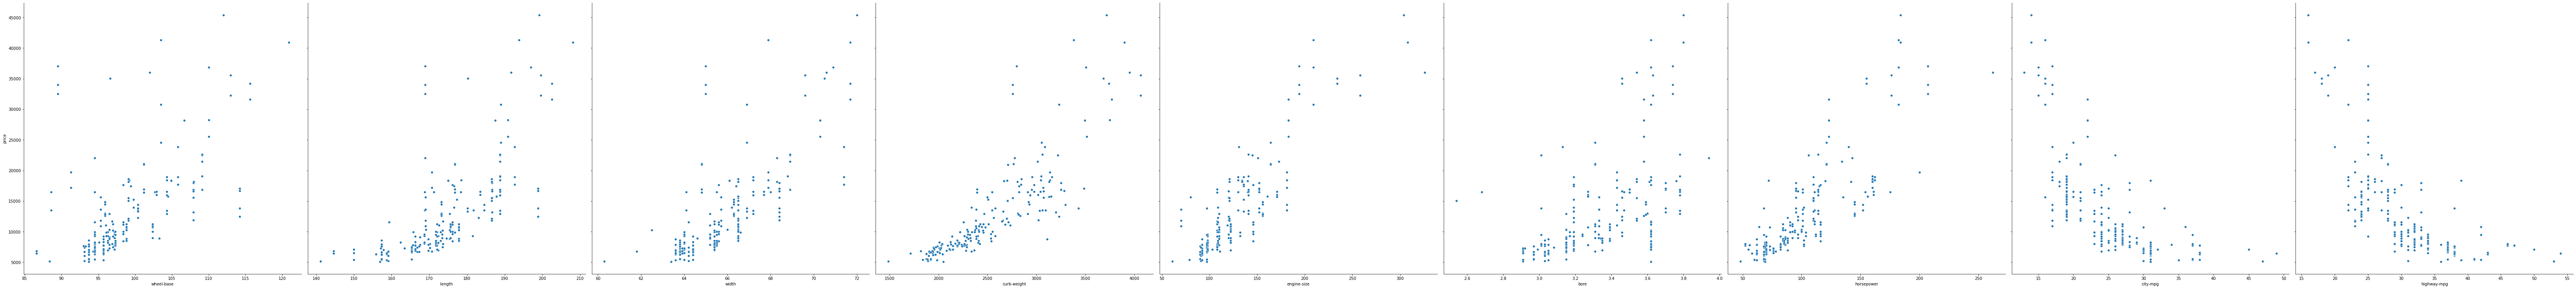

In [35]:
#f,ax=plt.subplots(figsize=(20,20))
#ax.set(xscale="log", yscale="log")
g=sns.pairplot(df, y_vars='price', x_vars=['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg'], height=10)
#g.set_xscale('log')
#g.map(plt.scatter)
#ax.show()
plt.show()

My Physicist intution says that some of these features can be tuned to extract more correlation with the price. I will make a fuction to compare the pearson correlation in default format and when the features are taken in a log function.

In [126]:
import scipy

def corr_log_compare(x,y):
    #input x,y are two np.array that are going to be compared with the standard correlation and corelation between their normal vs log
    #output will be a print statement saying the regular corelation and normal-log correlation
    
    normal_corr=scipy.stats.pearsonr(x,y)
    n_log_corr=scipy.stats.pearsonr(np.log(x), y)
    #l_n_corr = stats.pearsonr(x, np.log(y))
    #l_l_corr = stats.pearsonr(np.exp(x), y)
    print('Correlation of X-Y : [%.5f,%.5f]'%(normal_corr), ' log(X)-Y : [%.5f,%.5f]'%n_log_corr)




In [125]:
for i in df[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg']].columns:
    print('for ', i, ' vs price')
    corr_log_compare(df[i], df['price'])
    print(' ')

for  wheel-base  vs price
Correlation of X-Y : [0.58464,0.00000]  log(X)-Y : [0.57482,0.00000]
 
for  length  vs price
Correlation of X-Y : [0.69063,0.00000]  log(X)-Y : [0.67912,0.00000]
 
for  width  vs price
Correlation of X-Y : [0.75127,0.00000]  log(X)-Y : [0.74777,0.00000]
 
for  curb-weight  vs price
Correlation of X-Y : [0.83441,0.00000]  log(X)-Y : [0.81156,0.00000]
 
for  engine-size  vs price
Correlation of X-Y : [0.87234,0.00000]  log(X)-Y : [0.84325,0.00000]
 
for  bore  vs price
Correlation of X-Y : [0.54315,0.00000]  log(X)-Y : [0.53524,0.00000]
 
for  horsepower  vs price
Correlation of X-Y : [0.80968,0.00000]  log(X)-Y : [0.78064,0.00000]
 
for  city-mpg  vs price
Correlation of X-Y : [-0.68657,0.00000]  log(X)-Y : [-0.74719,0.00000]
 
for  highway-mpg  vs price
Correlation of X-Y : [-0.70469,0.00000]  log(X)-Y : [-0.76152,0.00000]
 


It seems like city-mpg and highway-mpg has better correlation when they are taken in log. 

In [129]:
df['city-mpg']= np.log(df['city-mpg'])
df['highway-mpg'] = np.log(df['highway-mpg'])

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,3.044522,3.295837,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,3.044522,3.295837,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,2.944439,3.258097,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,3.178054,3.401197,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,2.890372,3.091042,17450.0


In [133]:
df.select_dtypes(exclude='float').columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'curb-weight',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system'],
      dtype='object')

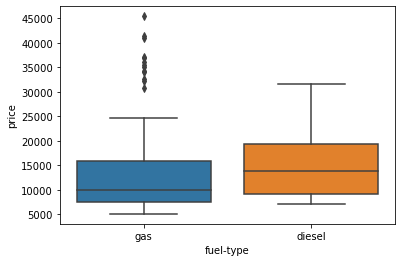

In [135]:
sns.boxplot(df['fuel-type'], df['price'])